In [16]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib2tikz import save as tikz_save
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot

In [17]:
folder = 'exps/grid_searchexp1w_bar4taskstd1y_snr100dim30is(\'ssubgd\', \'subgd\')istssubgdn100val_perc0.0-2019-01-20 14:26:57.873660'
files = os.listdir(folder)
def get_file(starts_with):
    for f in files:
        if f.startswith(starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None

metric_ltl = get_file("ltl-ss")
metric_itl = get_file("itl")
metric_oracle = get_file("itl")
metric_inner_initial= get_file("zero-losses")
metric_inner_oracle= get_file("inner-oracle")
metric_wbar= get_file("wbar-oracle")

In [22]:
def plot(metric_ltl, metric_itl, metric_oracle, metric_inner_initial=None, metric_inner_oracle=None, metric_wbar=None,
         use_valid_str='', y_label='', title='', save_dir_path=None, show_plot=True, filename='metric_test.png'):

    alpha = 0.1

    x = _plot(metric_ltl, use_valid_str, alpha, label='online LTL', color='orange')
    _plot(metric_itl, '', alpha, x=x, label='ITL', color='red')
    _plot(metric_oracle, '', alpha, x=x, label='Oracle', color='green')
    _plot(metric_inner_initial, '', alpha, x=x, label='w = 0', color='blue', linestyle='--')
    _plot(metric_inner_oracle, '', alpha, x=x, label=r'$w = w_\mu$', color='purple', linestyle='--')
    _plot(metric_wbar, '', alpha, x=x, label=r'$w = \bar{w}$', color='green', linestyle='-.')

    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('T')
    plt.xlim(right=x[-1], left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+'.png'))
        pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    else:
        plt.close()
        
def plot_2fig(metric_ltl, metric_itl, metric_oracle, metric_inner_initial=None, metric_inner_oracle=None,
              metric_wbar=None, use_valid_str='', y_label='', title='', name='loss', save_dir_path=None, show_plot=True):
    plot(metric_ltl, metric_itl, metric_oracle, None, None, None,
         use_valid_str, y_label, title, save_dir_path, show_plot, name)

    plot(metric_ltl, metric_itl, metric_oracle, metric_inner_initial, metric_inner_oracle, metric_wbar,
         use_valid_str, y_label, title, save_dir_path, show_plot, name+'_plus')

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


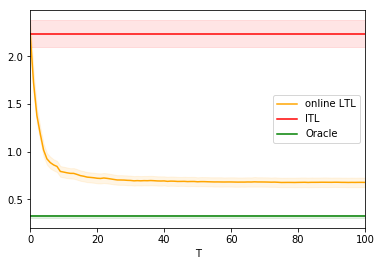

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


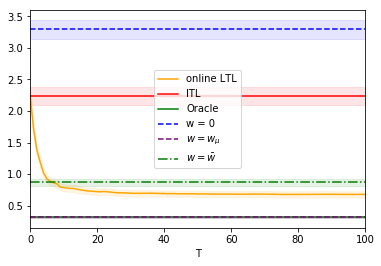

In [25]:
plot_2fig(metric_ltl, metric_itl, metric_inner_oracle, metric_inner_initial, metric_inner_oracle,
          metric_wbar, save_dir_path='plots')